In [4]:
from brian2 import *

Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 5s


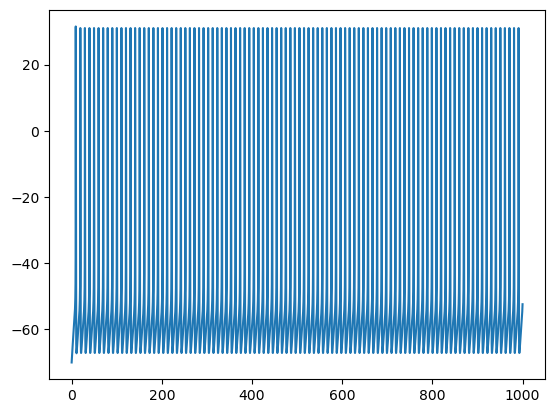

In [14]:


defaultclock.dt = 0.01*ms

Cm = 1*uF # /cm**2
Iapp = 2*uA
gL = 0.1*msiemens
EL = -65*mV
ENa = 55*mV
EK = -90*mV
gNa = 35*msiemens
gK = 9*msiemens

eqs = '''
dv/dt = (-gNa*m**3*h*(v-ENa)-gK*n**4*(v-EK)-gL*(v-EL)+Iapp)/Cm : volt
m = alpha_m/(alpha_m+beta_m) : 1
alpha_m = 0.1/mV*10*mV/exprel(-(v+35*mV)/(10*mV))/ms : Hz
beta_m = 4*exp(-(v+60*mV)/(18*mV))/ms : Hz
dh/dt = 5*(alpha_h*(1-h)-beta_h*h) : 1
alpha_h = 0.07*exp(-(v+58*mV)/(20*mV))/ms : Hz
beta_h = 1./(exp(-0.1/mV*(v+28*mV))+1)/ms : Hz
dn/dt = 5*(alpha_n*(1-n)-beta_n*n) : 1
alpha_n = 0.01/mV*10*mV/exprel(-(v+34*mV)/(10*mV))/ms : Hz
beta_n = 0.125*exp(-(v+44*mV)/(80*mV))/ms : Hz
'''

neuron = NeuronGroup(100, eqs, method='exponential_euler')
neuron.v = -70*mV
neuron.h = 1
M = StateMonitor(neuron, 'v', record=True)

run(1000*ms, report='text')

plot(M.t/ms, M[0].v/mV)
show()

